In [170]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import scipy.stats as sts

In [171]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [172]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [173]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [174]:
#Get rows that contain null values
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [175]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [176]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [177]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [178]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [179]:
# Get the number of data points from the suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [180]:
# Get the number of data points from the rural cities.
sum(city_data_df["type"]=="Rural")

18

In [181]:
# Get all the rows that contain null values.
# Make sure the fare and ride_id columns are numerical data types.

# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [182]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [183]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [184]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [185]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [186]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [187]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [188]:
#get the number of rides for each city type 
#list the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [189]:
#totaling number of rides for urban cities
total_urban_rides=urban_ride_count.sum()
total_urban_rides

1625

In [190]:
#same with suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [191]:
#totaling number of rides for suburban cities
total_suburban_rides=suburban_ride_count.sum()
total_suburban_rides

625

In [192]:
#last, rural total amount of rider
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [193]:
#totaling number of rides for suburban cities
total_rural_rides=rural_ride_count.sum()
total_rural_rides

125

In [194]:
#Getting the total numbers of drivers per city type
#Urban
urban_driver_count=urban_cities_df.drop_duplicates(subset="city")
total_urban_drivers=urban_driver_count["driver_count"].sum()
total_urban_drivers

2405

In [195]:
#Getting the total numbers of drivers per city type
#Suburban
suburban_driver_count=suburban_cities_df.drop_duplicates(subset="city")
total_suburban_drivers=suburban_driver_count["driver_count"].sum()
total_suburban_drivers

490

In [196]:
#Getting the total numbers of drivers per city type
#Rural
rural_driver_count=rural_cities_df.drop_duplicates(subset="city")
total_rural_drivers=rural_driver_count["driver_count"].sum()
total_rural_drivers

78

In [197]:
#Calculating total fares for urban cities
urban_total_fares = urban_cities_df.groupby(["city"]).sum()["fare"]
urban_total_fare = urban_total_fares.sum()
urban_total_fare

39854.38000000001

In [198]:
#Calculating total fares for suburban cities
suburban_total_fares = suburban_cities_df.groupby(["city"]).sum()["fare"]
suburban_total_fare=suburban_total_fares.sum()
suburban_total_fare

19356.33

In [199]:
#Calculating total fares for rural cities
rural_total_fares = rural_cities_df.groupby(["city"]).sum()["fare"]
rural_total_fare=rural_total_fares.sum()
rural_total_fare

4327.93

In [200]:
#Calculating the average fare per rides for each type of city 
#Urban
urban_fare_avg_ride=urban_total_fare/total_urban_rides
urban_fare_avg_ride

24.525772307692314

In [201]:
#Calculating the average fare per rides for each type of city 
#Suburban
suburban_fare_avg_ride=suburban_total_fare/total_suburban_rides
suburban_fare_avg_ride

30.970128000000003

In [202]:
#Calculating the average fare per rides for each type of city 
#Rural
rural_fare_avg_ride=rural_total_fare/total_rural_rides
rural_fare_avg_ride

34.62344

In [203]:
#Calculating the average fare per driver for each type of city 
#Urban
urban_driver_fare_avg=urban_total_fare/total_urban_drivers
urban_driver_fare_avg

16.57146777546778

In [204]:
#Calculating the average fare per driver for each type of city 
#Suburban
suburban_driver_fare_avg=suburban_total_fare/total_suburban_drivers
suburban_driver_fare_avg

39.50271428571429

In [205]:
#Calculating the average fare per driver for each type of city 
#Rural
rural_driver_fare_avg=rural_total_fare/total_rural_drivers
rural_driver_fare_avg

55.48628205128205

In [250]:
#Creating a new data frame to combine metrics
summary_by_types_df = pd.DataFrame({"Total Rides": [total_urban_rides, total_suburban_rides, total_rural_rides],
                                    "Total Drivers": [total_urban_drivers, total_suburban_drivers, total_rural_drivers],
                                   "Total Fares": [urban_total_fare, suburban_total_fare, rural_total_fare],
                                   "Average Fare per Ride": [urban_fare_avg_ride, suburban_fare_avg_ride, rural_fare_avg_ride],
                                   "Average Fare per Driver": [urban_driver_fare_avg, suburban_driver_fare_avg, rural_driver_fare_avg]})
summary_by_city_types_df=summary_by_types.rename(index={0:"Urban",1: "Suburban",2: "Rural"})
summary_by_city_types_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Urban,1625,2405,39854.38,24.525772,16.571468
Suburban,625,490,19356.33,30.970128,39.502714
Rural,125,78,4327.93,34.623440,55.486282


In [251]:
# Formatting
summary_by_city_types_df["Total Fares"] = summary_by_city_types_df["Total Fares"].map("${:,.2f}".format)

summary_by_city_types_df["Average Fare per Ride"] = summary_by_city_types_df["Average Fare per Ride"].map("${:.2f}".format)

summary_by_city_types_df["Average Fare per Driver"] = summary_by_city_types_df["Average Fare per Driver"].map("${:.2f}".format)

summary_by_city_types_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Urban,1625,2405,"$39,854.38",$24.53,$16.57
Suburban,625,490,"$19,356.33",$30.97,$39.50
Rural,125,78,"$4,327.93",$34.62,$55.49


In [254]:
#Creating new merged data frame and renaming the columns
new_pyber_df=pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
#displaying new df
new_pyber_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [337]:
# Changing the index to the Date column 
#Setting the Date column to a datetime index
new_pyber_df['Date']=pd.to_datetime(new_pyber_df['Date'])
#creating new dataframe with the datetime index 
clean_pyber_dataframe=new_pyber_df.set_index('Date')
#visualize changes
clean_pyber_dataframe

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [327]:
#Making a new data frame out of the city type and fare columns
#creating a selected column list
selected_columns=clean_pyber_dataframe[["City Type", "Fare"]]
#making new dataframe and copying columns
city_fares_df=selected_columns.copy()
#display new dataframe
city_fares_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [328]:
#Checking if index date format is true
city_fares_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [329]:
#Creating sum of fares by city and date using groupby function
#URBAN
urban_city_fares = city_fares_df[city_fares_df["City Type"] == "Urban"].groupby(["Date"]).sum()["Fare"]
sum_urban_cities=urban_city_fares.sum()
sum_urban_cities

39854.380000000005

In [330]:
#Creating sum of fares by city and date using groupby function
#SUBURBAN
suburban_city_fares = city_fares_df[city_fares_df["City Type"] == "Suburban"].groupby(["Date"]).sum()["Fare"]
sum_suburban_cities=suburban_city_fares.sum()
sum_suburban_cities

19356.33

In [331]:
#Creating sum of fares by city and date using groupby function
#RURAL
rural_city_fares = city_fares_df[city_fares_df["City Type"] == "Rural"].groupby(["Date"]).sum()["Fare"]
sum_rural_cities=rural_city_fares.sum()
sum_rural_cities

4327.929999999999

In [332]:
#Turning sum of fares into a data frame
sum_fares_by_city_type=pd.DataFrame({"Fare":[sum_rural_cities, sum_suburban_cities, sum_urban_cities]})
sum_fares_by_city_type

,Fare
0,4327.93
1,19356.33
2,39854.38


In [333]:
#Resetting the index and created a new cited data frame
reset_index_df=city_fares_df.reset_index()
reset_index_df

,Date,City Type,Fare
0,2019-01-14 10:14:22,Urban,13.83
1,2019-03-04 18:24:09,Urban,30.24
2,2019-02-24 04:29:00,Urban,33.44
3,2019-02-10 23:22:03,Urban,23.44
4,2019-03-06 04:28:35,Urban,34.58
...,...,...,...
2370,2019-04-29 17:04:39,Rural,13.38
2371,2019-01-30 00:05:47,Rural,20.76
2372,2019-02-10 21:03:50,Rural,11.11
2373,2019-05-07 19:22:15,Rural,44.94


In [334]:
#Creating a pivot table with index reset, date as the index, and the columns as city types
pivot_table = pd.pivot_table(reset_index_df, index=["Date"],
                    columns=["City Type"], aggfunc=np.sum)
#Display pivot table
pivot_table

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [335]:
#Using loc function to create new data frame from the pivot table
formatted_pivot_table=pivot_table.loc['2019-01-01':'2019-04-28']
formatted_pivot_table

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [364]:
#Creating new data frame to sum weekly the formatted pivot table 
weekly_fares=formatted_pivot_table.resample('W').sum()
#Display the pivot table
weekly_fares

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

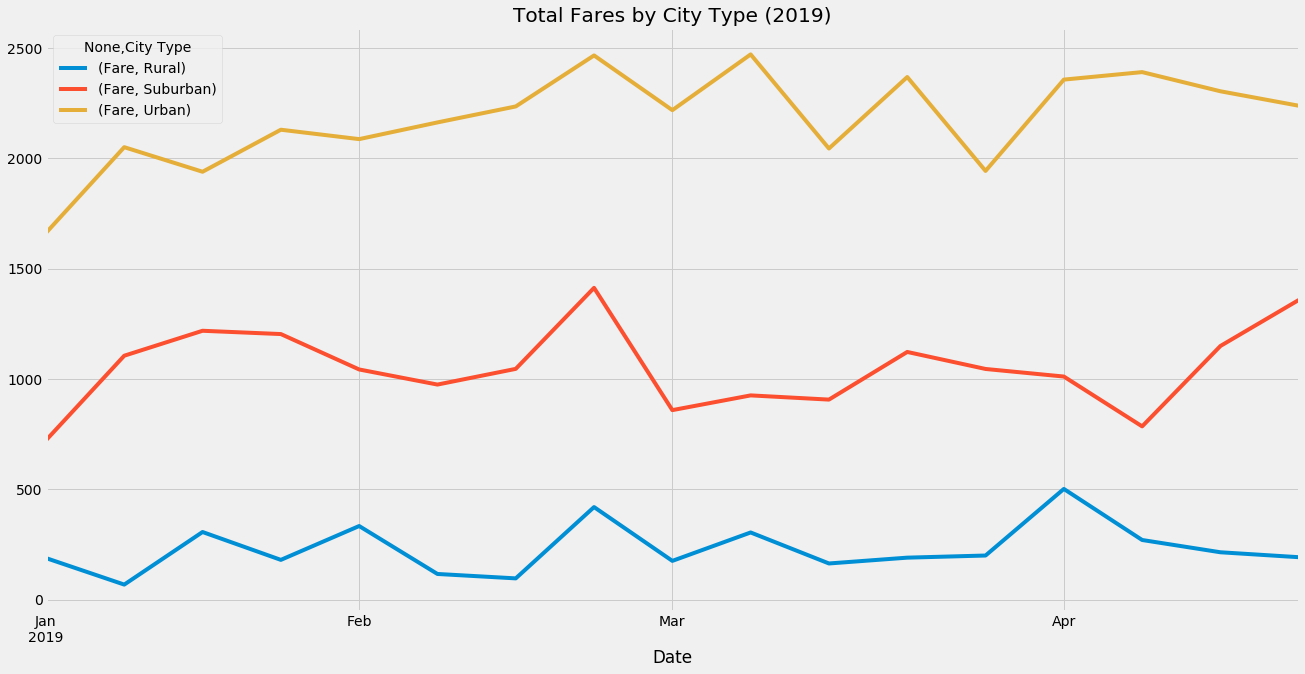

In [388]:
#Creating the graph
#Adding the style
plt.style.use('fivethirtyeight')
weekly_fares.plot(figsize=(20,10),
                 title="Total Fares by City Type (2019)")
plt.savefig("analysis/Fig10.png")
plt.show()